
# 项目：电影数据分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
    所选择的分析的数据集为tmdb-moive，其中包含了大量电影的各类信息，包含预算、收入、名称、导演、演员、公司、剧情摘要、时长、风格、上映日期、评分等。
    本报告旨在分析以下3个方面的问题：
        1，每部电影都有自己的风格类别，动作、冒险、科幻、惊悚等等。对于这种不同的风格类别，电影在movie database上的相对页面查看次数是怎样的？观众更倾向于在页面上查看哪一类电影？
        2，不同风格类别的电影的预算情况是怎样的？哪类电影需要较高的预算而哪类电影需要的预算较少？
        3，对于不同的风格类别，观众的喜好程度是怎么样的？有没有哪种风格类别是观众更为喜欢的？观众对于这种风格的喜爱程度有没有随时间发生改变？观众评分较高的电影类别是否也有相对较高的页面查看次数？

In [87]:
#导入需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [88]:
# 加载数据并打印几行。进行这几项操作，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### 数据清理：删除不需要的列，清理空值、冗余值，以及不合理的数据。
                 

In [89]:
# 在讨论数据结构和需要解决的任何问题之后，
# 在本部分的第二小部分进行这些清理步骤。
#了解数据的一些基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

可知该数据集共有10866条记录，21个列标签。其中cast，homepage，director，tagline，keywords，overview，genres，production_companies列存在空值。

In [90]:
#根据我们要探索的问题，我们可以先删除我们不需要其数据的列：
#budget，revenue，cast，homepage，director，taglinie，keywords，overview，runtime，production_companies,release_date,release_year
delect_list = ['budget','revenue','cast','homepage','director','tagline','keywords','overview','runtime','production_companies','release_date']
for i in delect_list:
    df.drop([i],axis = 1 ,inplace = True)
df.head()

,id,imdb_id,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [91]:
#s删除缺失值
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 10 columns):
id                10835 non-null int64
imdb_id           10835 non-null object
popularity        10835 non-null float64
original_title    10835 non-null object
genres            10835 non-null object
vote_count        10835 non-null int64
vote_average      10835 non-null float64
release_year      10835 non-null int64
budget_adj        10835 non-null float64
revenue_adj       10835 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 931.1+ KB


In [92]:
#查看是否有冗余数据
sum(df.duplicated())

1

In [93]:
#删除冗余数据
df.drop_duplicates(inplace  = True)
sum(df.duplicated())

0

In [94]:
#先将id列转换为字符格式,然后观察其他数值型数据的大致分布。
df['id']=df['id'].astype(str)
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04
mean,0.647776,217.970833,5.973159,2001.308196,1.760011e+07,5.151599e+07
std,1.001316,576.368151,0.933831,12.815839,3.434371e+07,1.448190e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208387,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384587,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715767,146.000000,6.600000,2011.000000,2.094246e+07,3.389667e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


我们发现budget_adj和revenue_adj列中有值为0的数据，我们应删除budget_adj和revenue_adj列中的最大值和最小值以增加数据分析的科学性。

In [95]:
#删除budget_adj和revenue_adj列中有值为0的数据
df = df[df['budget_adj'] > 0]
df = df[df['revenue_adj'] > 0]

In [96]:
#删除budget_adj和revenue_adj列中的最大值
df = df[df['budget_adj'] <  df['budget_adj'].max()]
df = df[df['revenue_adj'] < df['revenue_adj'].max()]

In [97]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3852.000000,3852.000000,3852.000000,3852.000000,3.852000e+03,3.852000e+03
mean,1.189659,525.779335,6.167861,2001.256750,4.409010e+07,1.363990e+08
std,1.469477,870.826202,0.794976,11.283936,4.428545e+07,2.117657e+08
min,0.001117,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462529,71.000000,5.700000,1995.000000,1.309053e+07,1.838858e+07
50%,0.797511,204.000000,6.200000,2004.000000,3.001558e+07,6.173068e+07
75%,1.368166,580.000000,6.700000,2010.000000,6.061307e+07,1.632225e+08
max,32.985763,9767.000000,8.400000,2015.000000,3.683713e+08,2.789712e+09


我们发现budget_adj列的最小值为9.693980e-01，这显然不合常理，说明还有异常数据。经百度搜索我们发现了一部成本较低的电影《追随》，其成本只有6000美金，祥见 https://tieba.baidu.com/p/1299420937?red_tag=0499225214 。因此我们可以以此为界限，剔除掉成本低于6000美金的数据已去除异常值。

In [98]:
df = df[df['budget_adj'] >=  6000]

In [99]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3830.000000,3830.000000,3830.000000,3830.000000,3.830000e+03,3.830000e+03
mean,1.194049,528.357963,6.169295,2001.269191,4.434335e+07,1.371186e+08
std,1.472370,872.599418,0.795175,11.285065,4.428585e+07,2.121289e+08
min,0.001117,10.000000,2.200000,1960.000000,6.310011e+03,2.370705e+00
25%,0.464331,72.000000,5.700000,1995.000000,1.329642e+07,1.877042e+07
50%,0.802644,205.500000,6.200000,2004.000000,3.029664e+07,6.206345e+07
75%,1.377080,582.000000,6.700000,2010.000000,6.076720e+07,1.646173e+08
max,32.985763,9767.000000,8.400000,2015.000000,3.683713e+08,2.789712e+09


In [100]:
#数据清理后检查数据集是否还存在空值，数据类型是否正确。
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3830 entries, 0 to 10848
Data columns (total 10 columns):
id                3830 non-null object
imdb_id           3830 non-null object
popularity        3830 non-null float64
original_title    3830 non-null object
genres            3830 non-null object
vote_count        3830 non-null int64
vote_average      3830 non-null float64
release_year      3830 non-null int64
budget_adj        3830 non-null float64
revenue_adj       3830 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 329.1+ KB


### 数据整理：根据要研究的问题，整理合适类型的数据集。

In [101]:
#对于以上问题，我们要探讨的问题都是和电影的风格类型有关的，而绝大多数电影的风格不止有一种，因此我们要建立一个新的数据集，将电影风格数据按风格
#拆分开。
#h函数参考 https://www.cnblogs.com/lemonbit/p/7270045.html
df_genres = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df_genres = df_genres.reset_index(drop = True)
df_genres.head()

,id,imdb_id,popularity,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,tt0369610,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,tt0369610,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,tt0369610,32.985763,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,tt1392190,28.419936,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [102]:
#查看新数据集的基本信息
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 10 columns):
id                10237 non-null object
imdb_id           10237 non-null object
popularity        10237 non-null float64
original_title    10237 non-null object
vote_count        10237 non-null int64
vote_average      10237 non-null float64
release_year      10237 non-null int64
budget_adj        10237 non-null float64
revenue_adj       10237 non-null float64
genres            10237 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 799.8+ KB


In [103]:
#查看各种电影风格的种类及数量信息
df_genres['genres'].value_counts()

Drama              1747
Comedy             1347
Thriller           1196
Action             1076
Adventure           744
Romance             661
Crime               649
Science Fiction     517
Horror              460
Family              423
Fantasy             391
Mystery             344
Animation           200
Music               134
History             129
War                 119
Western              51
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

至此，我们的数据清理、整理已完成。

<a id='eda'></a>
## 探索性数据分析



### 研究问题 1，每部电影都有自己的风格类别，动作、冒险、科幻、惊悚等等。对于这种不同的风格类别，电影在movie database上的相对页面查看次数是怎样的？观众更倾向于在页面上查看哪一类电影？

In [104]:
#经数据清理、整理阶段，我们知道了电影风格类型共有20种，我们选择数量大于100的16种电影类型，以确保数据的科学性。
#建立电影风格list
genres_list = ['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime',  'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror']

In [105]:
#计算每种类型的平均popularity
average_p = []
for i in genres_list:
    average_p.append(df_genres.groupby('genres').popularity.mean()[i])

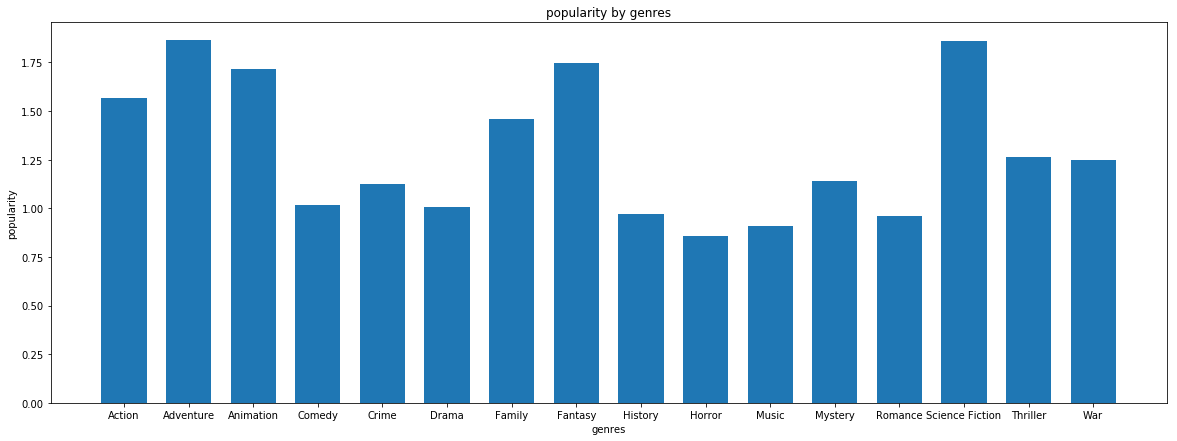

In [106]:
#作不同风格类别对应页面查看次数的柱状图
plt.figure(figsize=(20,7))
plt.bar(genres_list,average_p,width = 0.7);
plt.title ('popularity by genres');
plt.xlabel('genres');
plt.ylabel('popularity');

    结论：通过柱状图我们可以知道，总体上来看科幻电影，冒险电影，动作电影，卡通电影和奇幻电影这些风格的电影的网页搜索指数相比其他电影风格较高。

### 研究问题  2，不同风格类别的电影的预算情况是怎样的？哪类电影需要较高的预算而哪类电影需要的预算较少？

In [107]:
#计算每种类型的平均budget_adj
average_b = []
for i in genres_list:
    average_b.append(df_genres.groupby('genres').budget_adj.mean()[i])

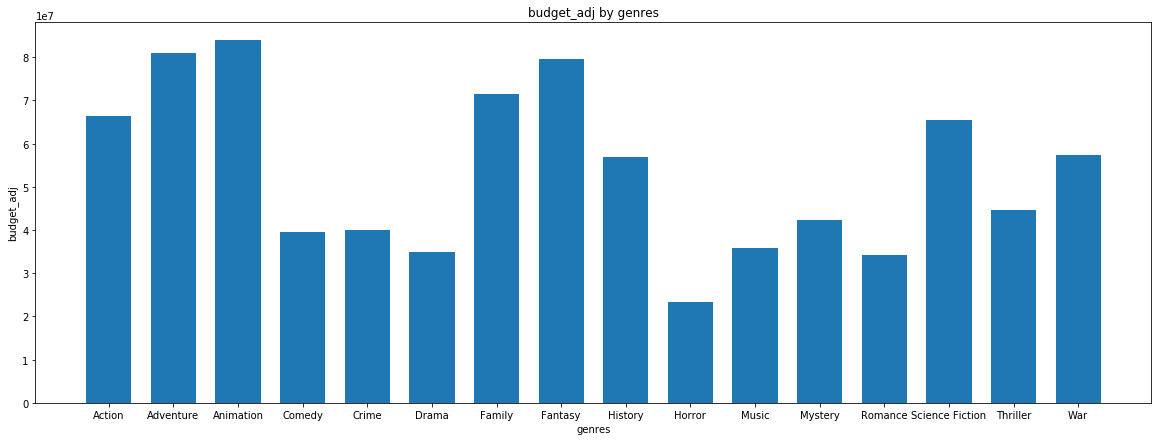

In [108]:
#作不同风格类别对于调整后预算的柱状图
plt.figure(figsize=(20,7))
plt.bar(genres_list,average_b,width = 0.7);
plt.title ('budget_adj by genres');
plt.xlabel('genres');
plt.ylabel('budget_adj');

结论：通过柱状图我们可以知道，卡通电影，冒险电影，动作电影，家庭电影，奇幻电影这几类电影的预算相比于其它电影较高，而惊悚电影，音乐电影，戏剧电影，浪漫电影和喜剧电影的预算较低。

### 研究问题 3，对于不同的风格类别，观众的喜好程度是怎么样的？有没有哪种风格类别是观众更为喜欢的？观众对于这种风格的喜爱程度有没有随时间发生改变？观众评分较高的电影类别是否也有相对较高的页面查看次数？

In [109]:
#计算每种类型的平均vote_average
average_v = []
for i in genres_list:
    average_v.append(df_genres.groupby('genres').vote_average.mean()[i])

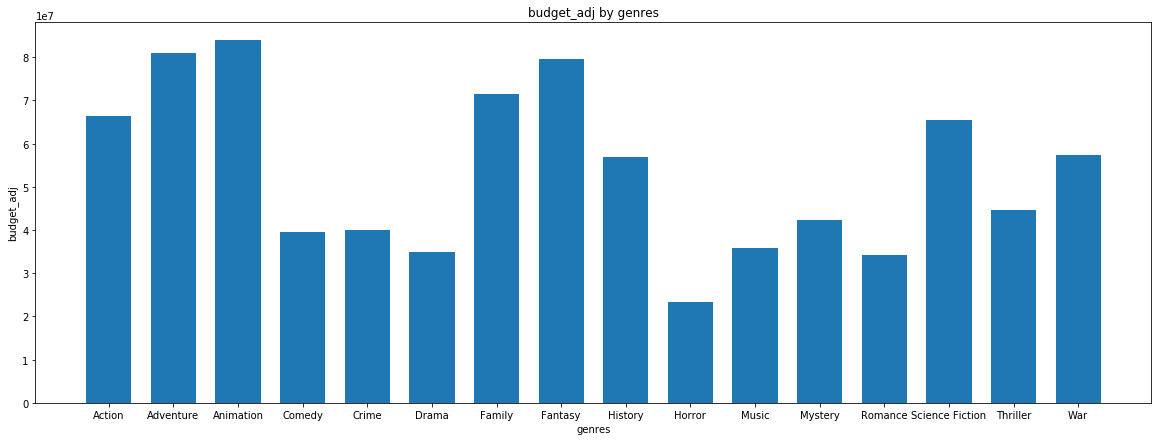

In [110]:
#作不同风格类别对应观众评分的柱状图
plt.figure(figsize=(20,7))
plt.bar(genres_list,average_b,width = 0.7);
plt.title ('budget_adj by genres');
plt.xlabel('genres');
plt.ylabel('budget_adj');

卡通电影，冒险电影，奇幻电影的总体评分位居前三项，相比其他电影较高。下面我们探索这三种风格的电影的喜爱程度有没有随时间发生改变。

1,分析卡通电影的评分随时间的变化。

In [111]:
#创建卡通电影数据集
df_animation = df_genres[df_genres['genres'] == 'Animation']

In [112]:
#创建卡通电影年份列表并排序
year_list_a = sorted(list(df_animation['release_year'].unique()))

In [113]:
#计算卡通电影每年的平均vote_average
animation_va= []
for i in year_list_a:
    animation_va.append(df_animation[df_animation['release_year'] == i].vote_average.mean())

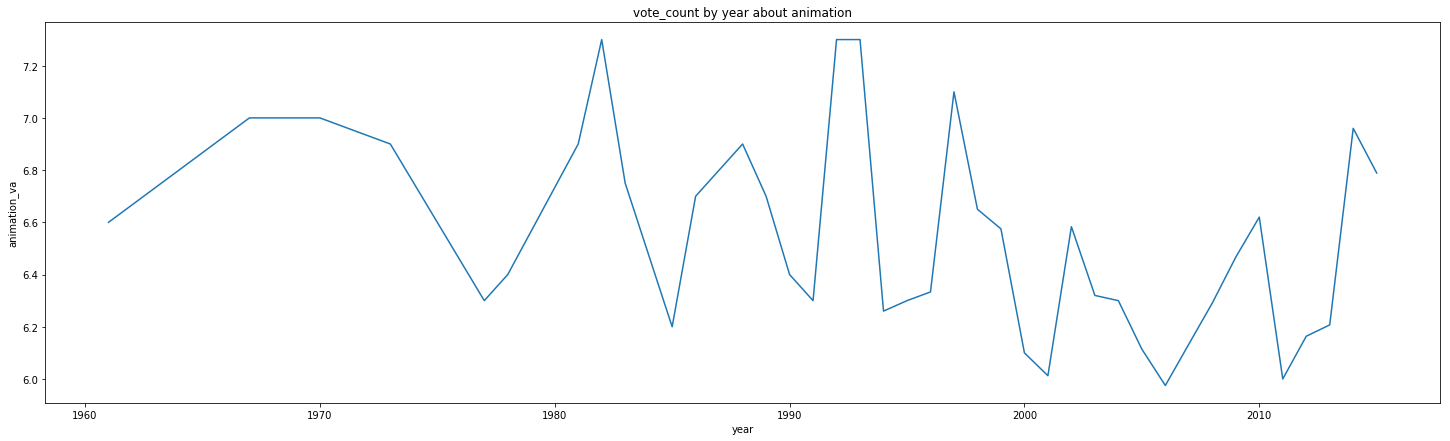

In [114]:
#作卡通电影评分随年份变化的折线图
plt.figure(figsize=(25,7))
plt.plot(year_list_a,animation_va);
plt.title ('vote_count by year about animation');
plt.xlabel('year');
plt.ylabel('animation_va');

由卡通电影评分随年份变化的折线图可知，卡通电影的评分整体水平均在6分以上，在6分到7.4分这个区域之间随时间波动较大。

2,分析冒险电影的评分随时间的变化。

In [115]:
#创建冒险电影数据集
df_adventure = df_genres[df_genres['genres'] == 'Adventure']

In [116]:
#创建冒险电影年份列表并排序
year_list_ab = sorted(list(df_animation['release_year'].unique()))

In [117]:
#计算冒险电影每年的平均vote_average
adventure_va= []
for i in year_list_ab:
    adventure_va.append(df_adventure[df_adventure['release_year'] == i].vote_average.mean())

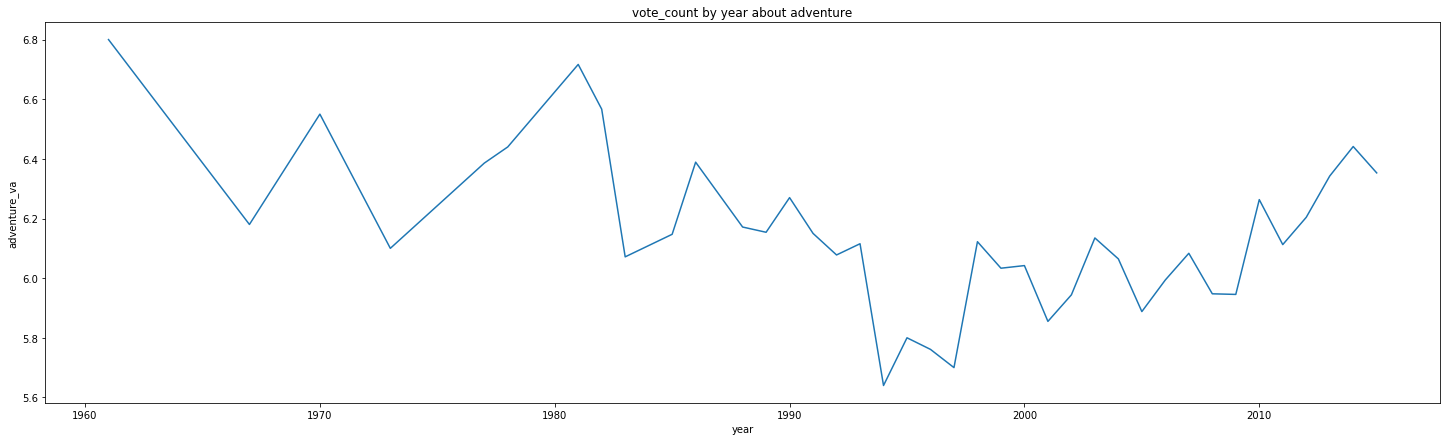

In [118]:
#作冒险电影评分随年份变化的折线图
plt.figure(figsize=(25,7))
plt.plot(year_list_ab,adventure_va);
plt.title ('vote_count by year about adventure');
plt.xlabel('year');
plt.ylabel('adventure_va');

由冒险电影评分随年份变化的折线图可知，卡通电影的评分整体水平均在5.6分以上，分布区间在在5.6分到6.8分，评分较卡通电影略低。在1985年之前，整体评分较高，但是波动也较大。之后评分整体呈下滑趋势，直到1995年之后整体评分才逐步上升。

3,分析奇幻电影的评分随时间的变化。

In [119]:
#创建奇幻电影数据集
df_fantasy = df_genres[df_genres['genres'] == 'Fantasy']

In [120]:
#创建奇幻电影年份列表并排序
year_list_f = sorted(list(df_fantasy['release_year'].unique()))

In [121]:
#计算奇幻电影每年的平均vote_average
fantasy_va= []
for i in year_list_f:
    fantasy_va.append(df_fantasy[df_fantasy['release_year'] == i].vote_average.mean())

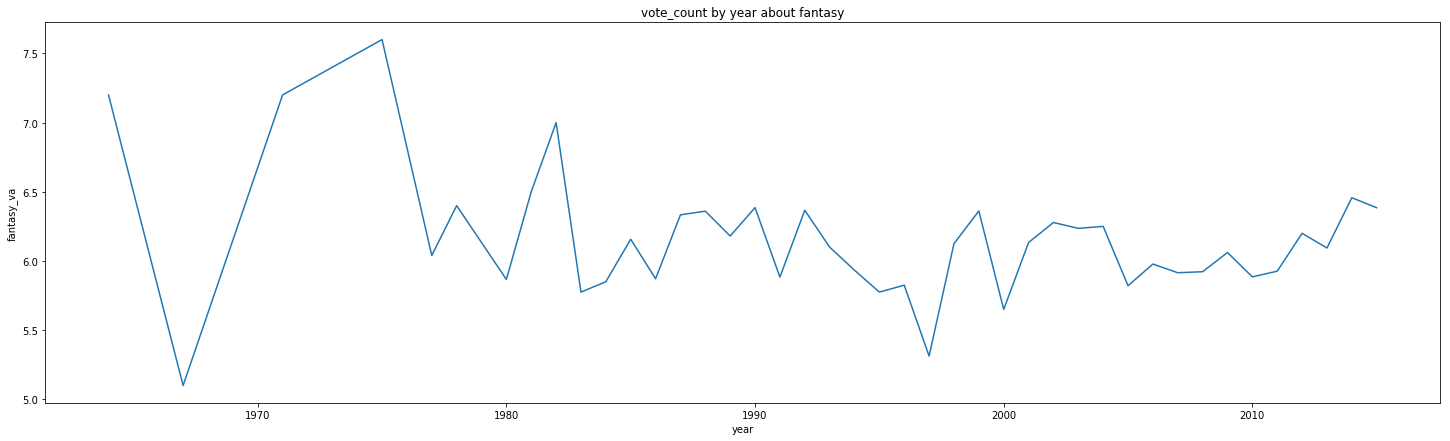

In [122]:
#作奇幻电影评分随年份变化的折线图
plt.figure(figsize=(25,7))
plt.plot(year_list_f,fantasy_va);
plt.title ('vote_count by year about fantasy');
plt.xlabel('year');
plt.ylabel('fantasy_va');

由奇幻电影评分随年份变化的折线图可知，奇幻电影的评分整体水平均在5分以上，较卡通电影和冒险电影略低。1980年之前在5分到7.6分之间波动，幅度较大。之后奇幻电影的评分趋于稳定，在6.2分左右上下波动。

电影评分整体水平最高的电影是卡通电影，冒险电影，奇幻电影，家庭电影和科幻电影，而页面相对浏览次数整体水平最高的电影是科幻电影，冒险电影，奇幻电影，卡通电影和动作电影。他们仅有同三种风格的电影是整体排名靠前的，但是其具体排序也不尽相同，因此我们并不能确定观众评分较高的电影类别也有相对较高的页面查看次数。

<a id='conclusions'></a>
## 结论
    经过以上分析，我们探究了不同风格电影的不同相对页面查看次数水平，不同风格电影的预算水平以及不同风格电影的整体评分水平。了解到科幻、动作、卡通、冒险、奇幻这几种风格的电影拥有较高的页面查看次数；卡通、冒险、动作、家庭、奇幻电影的制作需要有较高的预算；而卡通、冒险、奇幻、家庭、科幻电影的整体评分水平较高，观众对这几类电影有着较高的评价。
    我们还探究了评分水平最高的三类电影——卡通、冒险、奇幻的整体评分随时间变化的情况。首先这三类的电影评分整体水平比其他电影较高，但是评分也是在一个范围内随时间波动的。卡通电影的波动较大而奇幻电影的波动稍小一些。
    局限性：首先，我们是通过描述性统计来探究这些问题的，只能得到相关的统计结论，并不能探究不同风格电影和页面查看次数、预算、评分的具体关系，相互是否有影响。而且，很多电影不仅仅是一种风格，它的风格类型是由好几种风格组成起来的。我们在探究问题的过程中，将具有多种风格的电影的风格拆分开来作为不同的数据进行探究，这势必就忽略了不同风格的组合对一部电影各项指标的影响程度，以及这几种风格的影响权重之类的问题。

In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255